# <center><div class="alert alert-info">BigMart Sales Prediciton</div>
### <center> By - Jitendra Girish Patil

## Store Sales Prediction

The success of any retail store depends upon its sales. More the sales made, more is the revenue. With a good customer service and care, the customer too enjoys a good shopping experience. This will lead to more in-flow of customers, opening  more store branches across a city / country. 

To enable this, store owners rely heavily on past data to predict future sales. This will help them in strategizing their  business models and come up with innovative techniques and ideas to attract customers and set realistic goals.

Many medium to large stores implement this kind of analytics to understand trends like which products are getting sold  faster, what are the slow moving products, impact of store types, etc. With new branches of the store, the analysis can get  more complex and may also involve stiff competition from other competitors.

To get the better results for property owners, building a predictive model to determine the grade of house from A to E is required.

### <center><div class="alert alert-info">IMPORTING LIBRARIES</div>

In [10]:
import numpy as np                       # for numerical operation
import pandas as pd                      # for dataset handling
import matplotlib.pyplot as plt          # for data visualization
import seaborn as sb                     # for making statistical graphs
import warnings
warnings.filterwarnings('ignore')        # for warnings
from sklearn.model_selection import train_test_split   # for splitting the data
from sklearn import preprocessing        # for data preprocessing functions
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder      # for scaling
from sklearn.metrics import mean_squared_error     # for accuracy calculation or evaluation
from sklearn.linear_model import LinearRegression  # for algorithm

### <center><div class="alert alert-info">DATA EXPLORATION</div>

### Importing the data set

In [2]:
df = pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


### Checking Shape and Data type of dataset

In [3]:
# chekcing shape
df.shape

(14204, 12)

In [4]:
# checking dtypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Checking information and description

In [5]:
# checking description
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# checking information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


### <center><div class="alert alert-info">DATA VISUALISATION</div>

<AxesSubplot:title={'center':'Item MRP - Item Fat Content'}, xlabel='Item_MRP', ylabel='Item_Fat_Content'>

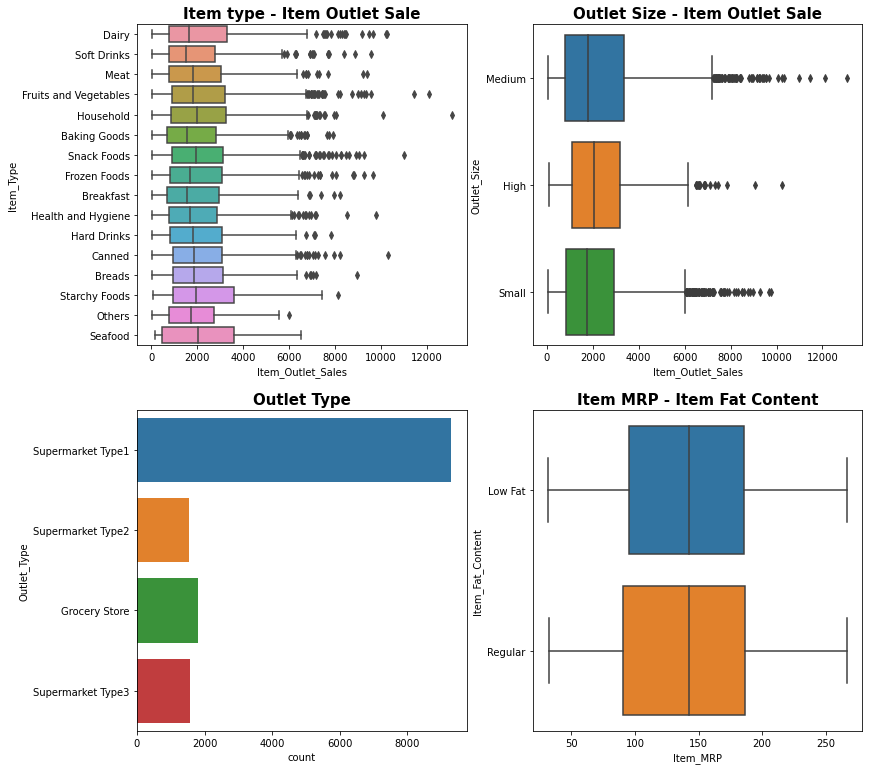

In [7]:
plt.subplots(2,2,figsize=(13,13))

plt.subplot(221)
plt.title('Item type - Item Outlet Sale', size=15, fontweight='bold')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Type')
sb.boxplot(y=df['Item_Type'],x=df['Item_Outlet_Sales'])

plt.subplot(222)
plt.title('Outlet Size - Item Outlet Sale', size=15, fontweight='bold')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Outlet Size')
sb.boxplot(y=df['Outlet_Size'],x=df['Item_Outlet_Sales'])

plt.subplot(223)
plt.title('Outlet Type', size=15, fontweight='bold')
plt.xlabel('Outlet Type')
sb.countplot(y=df['Outlet_Type'])

plt.subplot(224)
plt.title('Item MRP - Item Fat Content', size=15, fontweight='bold')
plt.xlabel('Item MRP')
plt.ylabel('Item Fat Content')
sb.boxplot(y=df['Item_Fat_Content'],x=df['Item_MRP'])

### <div class="alert alert-success">Interpretation</div>
     * In Item type - Item Outlet Sale graph, we can see Starchy Foods have most of the sales among other food type and            Other category have least.
     * In Outlet Size - Item Outlet Sale graph, Medium category have the maximum range from 1000 sales to 7000 sales and          small othlet have lest sales.
     * In Outlet Type graph, Supermarket 1 type have the highest count in the data which is more than 8000 in counts.
     * In Item MRP - Item Fat Content graph, both the Low and Regular fat food item have almost similar MRP.

<AxesSubplot:title={'center':'Item_Outlet_Sales'}, xlabel='Item_Outlet_Sales', ylabel='Count'>

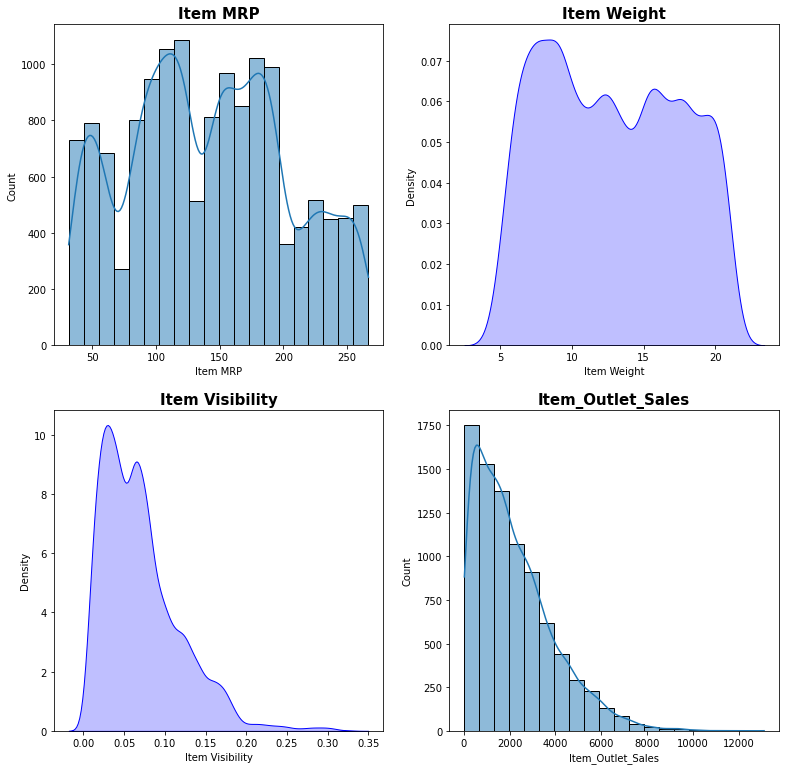

In [8]:
plt.subplots(2,2,figsize=(13,13))

plt.subplot(221)
plt.title('Item MRP', size=15, fontweight='bold')
plt.xlabel('Item MRP')
sb.histplot(df['Item_MRP'], bins=20, kde=True)

plt.subplot(222)
plt.title('Item Weight', size=15, fontweight='bold')
plt.xlabel('Item Weight')
sb.kdeplot(df['Item_Weight'], shade=True, color='blue')

plt.subplot(223)
plt.title('Item Visibility', size=15, fontweight='bold')
plt.xlabel('Item Visibility')
sb.kdeplot(df['Item_Visibility'], shade=True, color='blue')

plt.subplot(224)
plt.title('Item_Outlet_Sales', size=15, fontweight='bold')
plt.xlabel('Item_Outlet_Sales')
sb.histplot(df['Item_Outlet_Sales'], bins=20, kde=True)

### <div class="alert alert-success">Interpretation</div>
    * In Item MRP graph, Most of the item have MRP of 100-120 and least for more than 250 MRP.
    * In Item Weight graph, most of the items have weight from 7-9.
    * In Item Visibility grpah, the count is more for 0.02-0.03 and least for 0.3.
    * In Item Outlet Sales graph, Most of the sales is of 1000 which is counting upto 1600.

Text(0.5, 1.0, 'Item Type')

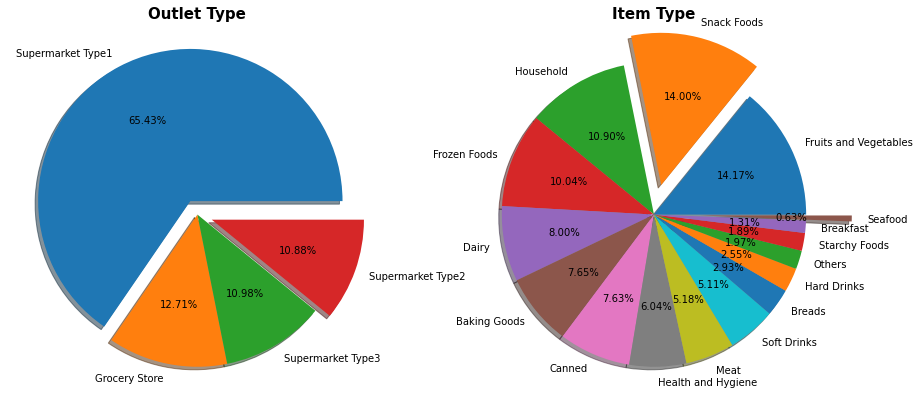

In [9]:
plt.subplots(1,2,figsize=(15,13))

plt.subplot(121)
explode = [0.1,0,0,0.1]
perc = df['Outlet_Type'].value_counts()
lab = list(df['Outlet_Type'].value_counts().index)
plt.pie(perc,labels = lab, autopct= "%0.2f%%", explode = explode, shadow=True)
plt.title('Outlet Type', size=15, fontweight='bold')

plt.subplot(122)
explode = [0,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3]
perc = df['Item_Type'].value_counts()
lab = list(df['Item_Type'].value_counts().index)
plt.pie(perc,labels = lab, autopct= "%0.2f%%", explode=explode, shadow=True)
plt.title('Item Type', size=15, fontweight='bold')

### <div class="alert alert-success">Interpretation</div>
    * In Outlet type graph, 65.43% are Supermarket Type1 and least 10.38% are of Supermarket Type2.
    * In Item type graph, snack foods is the most served with 14% and Sea food is least searved with only 0.63%

### <center><div class="alert alert-info">DATA PREPROCESSING</div>

### Checking Null Values

In [7]:
(df.isnull().sum()*100)/df.shape[0]

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

* As we can see there are ~40% of null values present in the target column.

### Feature Selection - removing unnecessary features

In [12]:
df.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)

### Converting from non numeric to numeric dtypes

In [13]:
col = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Type','Outlet_Location_Type','Outlet_Establishment_Year']
label_encoder = LabelEncoder()
for i in col:
    df[i] = df[i].astype('category')
    df[i] = label_encoder.fit_transform(df[i])

In [14]:
df.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [15]:
# using KNNImputer for imputing the values
from sklearn.impute import KNNImputer
null = KNNImputer(n_neighbors=3)
impute= null.fit_transform(df)

In [16]:
imp = pd.DataFrame(impute)
imp.columns = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type','Item_MRP','Outlet_Establishment_Year',
               'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','Item_Outlet_Sales']
imp.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Scaling the data

In [17]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(imp.to_numpy()),columns=imp.columns)
df_scaled.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,0.0,0.038399,0.266667,0.927507,0.500,0.5,0.0,0.333333,0.283587
1,0.081274,1.0,0.048346,0.933333,0.072068,1.000,0.5,1.0,0.666667,0.031419
2,0.770765,0.0,0.040593,0.666667,0.468288,0.500,0.5,0.0,0.333333,0.158115
3,0.871986,1.0,0.218055,0.400000,0.640093,0.375,0.5,1.0,0.000000,0.053555
4,0.260494,0.0,0.186950,0.600000,0.095805,0.125,0.0,1.0,0.333333,0.073651


### Checking correlation

In [18]:
corr = df_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.000301,0.000944,-0.001719,0.001913,0.022272
Item_Fat_Content,-0.033737,1.000000,0.048315,-0.147733,-0.004019,0.000142,-0.000827,0.001373,-0.000228,0.014065
Item_Visibility,-0.020472,0.048315,1.000000,-0.037821,-0.009144,-0.100123,0.026808,-0.020550,-0.172744,-0.109153
Item_Type,0.031884,-0.147733,-0.037821,1.000000,0.043948,0.003295,-0.001080,0.002083,0.004305,0.027056
Item_MRP,0.035751,-0.004019,-0.009144,0.043948,1.000000,0.000302,-0.001305,0.000838,0.000136,0.622803
Outlet_Establishment_Year,0.000301,0.000142,-0.100123,0.003295,0.000302,1.000000,0.323491,0.041889,-0.040255,-0.028736
Outlet_Size,0.000944,-0.000827,0.026808,-0.001080,-0.001305,0.323491,1.000000,-0.590677,-0.260496,-0.062001
Outlet_Location_Type,-0.001719,0.001373,-0.020550,0.002083,0.000838,0.041889,-0.590677,1.000000,0.467251,0.107565
Outlet_Type,0.001913,-0.000228,-0.172744,0.004305,0.000136,-0.040255,-0.260496,0.467251,1.000000,0.359421
Item_Outlet_Sales,0.022272,0.014065,-0.109153,0.027056,0.622803,-0.028736,-0.062001,0.107565,0.359421,1.000000


In [15]:
corr = abs(df_scaled.corr())
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.622803
Outlet_Type                  0.359421
Item_Visibility              0.109153
Outlet_Location_Type         0.107565
Outlet_Size                  0.062001
Outlet_Establishment_Year    0.028736
Item_Type                    0.027056
Item_Weight                  0.022272
Item_Fat_Content             0.014065
Name: Item_Outlet_Sales, dtype: float64

### <center><div class="alert alert-info">MODEL BUILDING AND TRAINING</div>

## 1. Linear Regressor

### Linear Regression for Univariate feature


#### Splitting the data using Train Test Split

In [18]:
x1 = np.array(imp['Item_MRP']).reshape(-1,1)
y1 = np.array(imp['Item_Outlet_Sales'])

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.3, random_state=5)

In [19]:
lin_model1 = LinearRegression().fit(x1_train, y1_train)     #building and training the model
y_pred1 = lin_model1.predict(x1_test)
print('Predicted Response is:', y_pred1)

Predicted Response is: [3607.5458626  1546.06386515 1631.0508941  ... 1465.70767944 2698.34347798
 3589.4335665 ]


In [20]:
lin_perf_tr1 = round(lin_model1.score(x1_train, y1_train)*100,3)
lin_perf_ts1 = round(lin_model1.score(x1_test, y1_test)*100,3)
print('Training :', lin_perf_tr1)
print('Testing :',lin_perf_ts1)

Training : 38.866
Testing : 38.602


In [54]:
mse1 = round(mean_squared_error(y1_test, y_pred1),2)
rmse1 = round(mean_squared_error(y1_test, y_pred1, squared=False),2)

print('MSE:', mse1)
print( 'RMSE:', rmse1)

MSE: 1473989.99
RMSE: 1214.08


### Linear Regression for Bivariate Feature

#### Splitting the data using Train Test Split

In [22]:
x2 = np.array(imp[['Item_MRP','Outlet_Type']]).reshape(-1,2)
y2 = np.array(imp['Item_Outlet_Sales'])

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.3, random_state=5)

In [23]:
lin_model2 = LinearRegression().fit(x2_train, y2_train)     #building and training the model
y_pred2 = lin_model2.predict(x2_test)
print('Predicted Response is:', y_pred2)

Predicted Response is: [3460.48391374  704.94151218 1490.00886724 ... 1325.16924772 1853.71156212
 2742.08760739]


In [24]:
lin_perf_tr2 = round(lin_model2.score(x2_train, y2_train)*100,3)
lin_perf_ts2 = round(lin_model2.score(x2_test, y2_test)*100,3)
print('Training :', lin_perf_tr2)
print('Testing :',lin_perf_ts2)

Training : 51.698
Testing : 51.704


In [55]:
mse2 = round(mean_squared_error(y2_test, y_pred2),2)
rmse2 = round(mean_squared_error(y2_test, y_pred2, squared=False),2)

print('MSE:', mse2)
print( 'RMSE:', rmse2)

MSE: 1159440.04
RMSE: 1076.77


### Linear Regression using All Features

#### Splitting the data using Train Test Split

In [26]:
x3 = np.array(imp.drop(['Item_Outlet_Sales'],axis=1))
y3 = np.array(imp['Item_Outlet_Sales'])

x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size=0.3, random_state=5)

In [27]:
lin_model3 = LinearRegression().fit(x3_train, y3_train)     #building and training the model
y_pred3 = lin_model3.predict(x3_test)
print('Predicted Response is:', y_pred3)

Predicted Response is: [3430.16699579  802.87940542 1520.77831225 ... 1348.84808053 1429.0490361
 2917.86021602]


In [28]:
lin_perf_tr3 = round(lin_model3.score(x3_train, y3_train)*100,3)
lin_perf_ts3 = round(lin_model3.score(x3_test, y3_test)*100,3)
print('Training :', lin_perf_tr3)
print('Testing :',lin_perf_ts3)

Training : 52.527
Testing : 51.944


In [56]:
mse3 = round(mean_squared_error(y3_test, y_pred3),2)
rmse3 = round(mean_squared_error(y3_test, y_pred3, squared=False),2)

print('MSE:', mse3)
print( 'RMSE:', rmse3)

MSE: 1153674.36
RMSE: 1074.09


## 2. Decision Tree Regressor

In [30]:
from sklearn.model_selection import KFold
x = np.array(imp.drop(columns='Item_Outlet_Sales', axis =1))
y = np.array(imp['Item_Outlet_Sales'])
kf = KFold(n_splits=3, shuffle=False, random_state=None)
for train, test in kf.split(x,y):
    print("Train data",train,"Test data",test)
    x4_train,x4_test = x[train], x[test]
    y4_train,y4_test = y[train], y[test]

Train data [ 4735  4736  4737 ... 14201 14202 14203] Test data [   0    1    2 ... 4732 4733 4734]
Train data [    0     1     2 ... 14201 14202 14203] Test data [4735 4736 4737 ... 9467 9468 9469]
Train data [   0    1    2 ... 9467 9468 9469] Test data [ 9470  9471  9472 ... 14201 14202 14203]


In [33]:
# Importing Library
from sklearn.tree import DecisionTreeRegressor

In [34]:
# importing library
from sklearn.model_selection import cross_val_score
# defining function to calculate least rmse value on the respective depth
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'RMSE Score : {rmse.round(2)}')
    print()
max_depth = [2,3,4,5,6,8,10]
for val in max_depth:
    score = cross_val_score(DecisionTreeRegressor(max_depth=val,random_state=5), x1,y1, cv=kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 2
RMSE Score : 1236.62

For max depth: 3
RMSE Score : 1219.42

For max depth: 4
RMSE Score : 1217.54

For max depth: 5
RMSE Score : 1223.03

For max depth: 6
RMSE Score : 1233.19

For max depth: 8
RMSE Score : 1260.34

For max depth: 10
RMSE Score : 1287.58



### <div class="alert alert-success">Interpretation</div>
    - On the Basis of above values we can use 4 as a maximum depth as it gives us the least RMSE of 1217.54

In [35]:
tree_model = DecisionTreeRegressor(max_depth=4).fit(x4_train, y4_train)
y_pred4 = tree_model.predict(x4_test)
print('Prediction :',y_pred4)

Prediction : [ 769.06238217 2780.7547829  1354.54738752 ... 1708.54384065 3837.42739864
 1708.54384065]


In [36]:
tree_tr_per = tree_model.score(x4_train, y4_train)*100
print('Training Performance :',tree_tr_per)
tree_tes_per = tree_model.score(x4_test, y4_test)*100
print('Testing Performance :',tree_tes_per)

Training Performance : 58.021874940158526
Testing Performance : 50.70997231729323


In [57]:
mse4 = round(mean_squared_error(y4_test, y_pred4),2)
rmse4 = round(mean_squared_error(y4_test, y_pred4, squared=False),2)

print('MSE:', mse4)
print( 'RMSE:', rmse4)

MSE: 809775.31
RMSE: 899.88


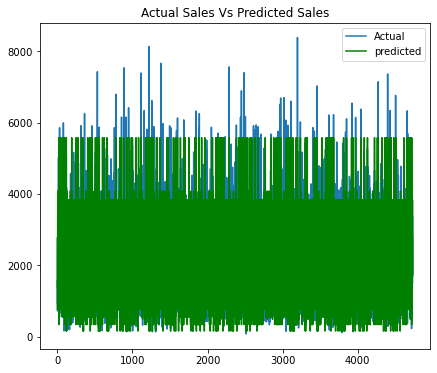

In [38]:
plt.figure(figsize=(7,6))
plt.plot(y4_test,label="Actual")
plt.plot(y_pred4,color="green",label="predicted")
plt.title("Actual Sales Vs Predicted Sales")
plt.legend()
plt.show()

### Interpretation - 
The Predicited points are almost matching with the Actual points.

## 3. Random Forest Regressor

In [39]:
# importing Library
from sklearn.ensemble import RandomForestRegressor       # for random forest algorithm

In [40]:
# defining function to calculate least rmse value on the respective depth
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'RMSE Score : {rmse.round(2)}')
    print()
max_depth = [2,3,4,5,6,8,10]
for val in max_depth:
    score = cross_val_score(RandomForestRegressor(max_depth=val,random_state=5), x1,y1, cv=kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 2
RMSE Score : 1229.37

For max depth: 3
RMSE Score : 1215.46

For max depth: 4
RMSE Score : 1214.87

For max depth: 5
RMSE Score : 1215.38

For max depth: 6
RMSE Score : 1216.83

For max depth: 8
RMSE Score : 1223.54

For max depth: 10
RMSE Score : 1235.19



### Interpretation
    - On the Basis of above values we can use 4 as a maximum depth as it gives us the least RMSE of 1214.87

In [41]:
rfr_model1 = RandomForestRegressor(max_depth=4).fit(x4_train, y4_train)
y_pred5 = rfr_model1.predict(x4_test)
print('Prediction :',y_pred5)

Prediction : [ 759.94946574 2721.25112893 1087.02392795 ... 1743.79586308 3777.68245058
 1438.37443906]


In [42]:
train_score1 = rfr_model1.score(x4_train, y4_train)*100
test_score1 = rfr_model1.score(x4_test, y4_test)*100
print(f'Training Score is : {train_score1}\nTesting Score is : {test_score1}')

Training Score is : 58.74783963950561
Testing Score is : 52.02810125646382


In [60]:
mse5 = round(mean_squared_error(y4_test, y_pred5),2)
rmse5 = round(mean_squared_error(y4_test, y_pred5, squared=False),2)
print('MSE:', mse5)
print( 'RMSE:', rmse5)

MSE: 788120.05
RMSE: 887.76


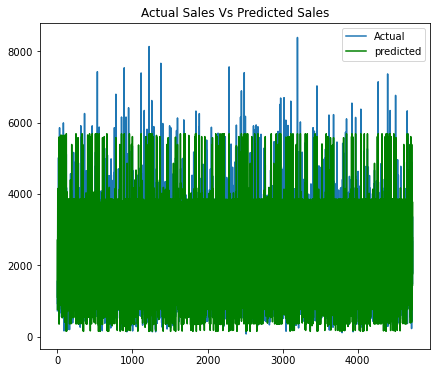

In [50]:
plt.figure(figsize=(7,6))
plt.plot(y4_test,label="Actual")
plt.plot(y_pred5,color="green",label="predicted")
plt.title("Actual Sales Vs Predicted Sales")
plt.legend()
plt.show()

### Interpretation - 
The Predicited points are almost matching with the Actual points.

## 4. Stacking

In [44]:
# importing library
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import KFold, cross_validate

In [45]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LinearRegression()))
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svr', SVR()))
 
    # define meta learner model
    level1 = LinearRegression()
 
    # define the stacking ensemble
    s_model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return s_model

In [46]:
model_new = get_stacking().fit(x4_train, y4_train)
y_pred6 = model_new.predict(x4_test)
print('Prediction :',y_pred6)

Prediction : [ 516.4819036  1857.88513069 1919.73946597 ... 1719.22976832 3412.6160616
 1129.58283375]


In [47]:
st_per_tr = model_new.score(x4_train, y4_train)*100
st_per_ts = model_new.score(x4_test, y4_test)*100
print(f'Training Score is : {st_per_tr}\nTesting Score is : {st_per_ts}')

Training Score is : 70.37508550094238
Testing Score is : 68.39846000276533


In [61]:
mse6 = round(mean_squared_error(y4_test, y_pred6),2)
rmse6 = round(mean_squared_error(y4_test, y_pred6, squared=False),2)

print('MSE:', mse6)
print( 'RMSE:', rmse6)

MSE: 519174.93
RMSE: 720.54


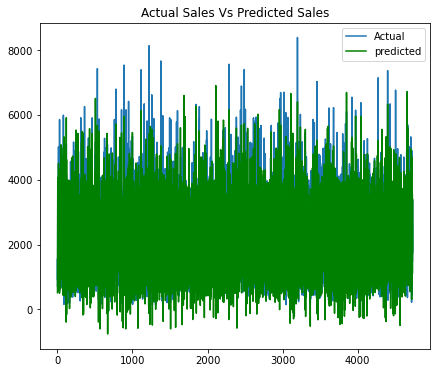

In [51]:
plt.figure(figsize=(7,6))
plt.plot(y4_test,label="Actual")
plt.plot(y_pred6,color="green",label="predicted")
plt.title("Actual Sales Vs Predicted Sales")
plt.legend()
plt.show()

### Interpretation - 
The Predicited points are almost matching with the Actual points.

### <center><div class="alert alert-info">COMPARISION</div>

In [62]:
compare = pd.DataFrame({'Train Perf':[lin_perf_tr1,lin_perf_tr2,lin_perf_tr3,tree_tr_per,train_score1,st_per_tr],
                        'Test Perf':[lin_perf_ts1,lin_perf_ts2,lin_perf_ts3,tree_tes_per,test_score1,st_per_tr],
                        'MSE':[mse1,mse2,mse3,mse4,mse5,mse6],'RMSE':[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6]},
                      index=['Linear Univariate','Linear Bivariate','Linear Multivariate','Decision Tree','Random Forest','Stacking'])
compare

,Train Perf,Test Perf,MSE,RMSE
Linear Univariate,38.866000,38.602000,1473989.99,1214.08
Linear Bivariate,51.698000,51.704000,1159440.04,1076.77
Linear Multivariate,52.527000,51.944000,1153674.36,1074.09
Decision Tree,58.021875,50.709972,809775.31,899.88
Random Forest,58.747840,52.028101,788120.05,887.76
Stacking,70.375086,70.375086,519174.93,720.54


### <center><div class="alert alert-info">CONCLUSION</div> 
* There were 4 models prepared for getting the best performance and prediction, Linear Regression, Decision Tree Regression, Random Forest Regression and Stacking Regression.
* On the basis of graph and the table we obtained, Stacking can be said as best model among other models.
    - As the Testing Performance is comparitively good than other models 
    - The MSE and RMSE errors are less than the other models.
* Even though the Stacking Regressor Model is best among other models, the performance is not good enough giving us only 70% of performance. It is because the target column have ~40% of null values and imputing the data can be a bit biased in that case.

### <center><div class="alert alert-info">BUSINESS IMPLICATION</div>
* We can see Starchy Foods have most of the sales among other food type and the outlet with starchy food will be beneficial for the sales as most of the customers prefer and cold drinks are prefered the least.
* Most of the outlet size is medium so, Medium category have the maximum range from 1000 sales to 7000 sales and          small othlet have least sales.
* If the outlet type is supermarket especially Supermarket type1 it have the highest count in the sales than any other type of outlet followed by Grocery Store.
* If the item MRP is kept between 100-120 there is a high chance that the sales will be more.
* Sales is high if Visibility is around 0.02-0.03 and least for 0.3.
* In Item Outlet Sales graph, Most of the sales is of 1000 which is counting upto 1600.
* Snacks are most popular item which the customers consumes. Having snacks at the market will be a great way to increase the sales.